# Pydantic with gemini

In [1]:
from dotenv import load_dotenv
import os
from google import genai 

load_dotenv()

client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))
response = client.models.generate_content(model= "gemini-2.5-flash", contents= "tell me a programming joke")

print(response.text)


Why was the JavaScript developer sad?

Because they didn't Node how to Express themselves, and everything felt `undefined`.


In [2]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents="""You are a helpful assistants. 
    I need you to create a JSON object representing a library.
    The library's name should be "Coolu Libraru" and have fields name and books that contains a list of books.
    Each book should have a 'title', 'author', and 'year' field.
    Make sure the output is a single, valid  JSON object.
    Give me 10 books. Remove the ``` json and ``` """
)

response.text


'{\n  "name": "Coolu Libraru",\n  "books": [\n    {\n      "title": "The Hitchhiker\'s Guide to the Galaxy",\n      "author": "Douglas Adams",\n      "year": 1979\n    },\n    {\n      "title": "1984",\n      "author": "George Orwell",\n      "year": 1949\n    },\n    {\n      "title": "Pride and Prejudice",\n      "author": "Jane Austen",\n      "year": 1813\n    },\n    {\n      "title": "To Kill a Mockingbird",\n      "author": "Harper Lee",\n      "year": 1960\n    },\n    {\n      "title": "The Great Gatsby",\n      "author": "F. Scott Fitzgerald",\n      "year": 1925\n    },\n    {\n      "title": "Moby Dick",\n      "author": "Herman Melville",\n      "year": 1851\n    },\n    {\n      "title": "War and Peace",\n      "author": "Leo Tolstoy",\n      "year": 1869\n    },\n    {\n      "title": "Dune",\n      "author": "Frank Herbert",\n      "year": 1965\n    },\n    {\n      "title": "The Lord of the Rings",\n      "author": "J.R.R. Tolkien",\n      "year": 1954\n    },\n    {\n

In [3]:
print(response.text)

{
  "name": "Coolu Libraru",
  "books": [
    {
      "title": "The Hitchhiker's Guide to the Galaxy",
      "author": "Douglas Adams",
      "year": 1979
    },
    {
      "title": "1984",
      "author": "George Orwell",
      "year": 1949
    },
    {
      "title": "Pride and Prejudice",
      "author": "Jane Austen",
      "year": 1813
    },
    {
      "title": "To Kill a Mockingbird",
      "author": "Harper Lee",
      "year": 1960
    },
    {
      "title": "The Great Gatsby",
      "author": "F. Scott Fitzgerald",
      "year": 1925
    },
    {
      "title": "Moby Dick",
      "author": "Herman Melville",
      "year": 1851
    },
    {
      "title": "War and Peace",
      "author": "Leo Tolstoy",
      "year": 1869
    },
    {
      "title": "Dune",
      "author": "Frank Herbert",
      "year": 1965
    },
    {
      "title": "The Lord of the Rings",
      "author": "J.R.R. Tolkien",
      "year": 1954
    },
    {
      "title": "Brave New World",
      "author": "

# Pydantic to validate the simulated data

In [4]:
from pydantic import BaseModel, Field
from datetime import datetime

class Book(BaseModel):
    title: str 
    author: str
    year: int = Field(gt= 1000, lt= datetime.now().year)
    
    
class Library(BaseModel):
    name: str
    books: list[Book]
    
    
library = Library.model_validate_json(response.text)
library


Library(name='Coolu Libraru', books=[Book(title="The Hitchhiker's Guide to the Galaxy", author='Douglas Adams', year=1979), Book(title='1984', author='George Orwell', year=1949), Book(title='Pride and Prejudice', author='Jane Austen', year=1813), Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960), Book(title='The Great Gatsby', author='F. Scott Fitzgerald', year=1925), Book(title='Moby Dick', author='Herman Melville', year=1851), Book(title='War and Peace', author='Leo Tolstoy', year=1869), Book(title='Dune', author='Frank Herbert', year=1965), Book(title='The Lord of the Rings', author='J.R.R. Tolkien', year=1954), Book(title='Brave New World', author='Aldous Huxley', year=1932)])

In [5]:
library.name

'Coolu Libraru'

In [6]:
library.books

[Book(title="The Hitchhiker's Guide to the Galaxy", author='Douglas Adams', year=1979),
 Book(title='1984', author='George Orwell', year=1949),
 Book(title='Pride and Prejudice', author='Jane Austen', year=1813),
 Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960),
 Book(title='The Great Gatsby', author='F. Scott Fitzgerald', year=1925),
 Book(title='Moby Dick', author='Herman Melville', year=1851),
 Book(title='War and Peace', author='Leo Tolstoy', year=1869),
 Book(title='Dune', author='Frank Herbert', year=1965),
 Book(title='The Lord of the Rings', author='J.R.R. Tolkien', year=1954),
 Book(title='Brave New World', author='Aldous Huxley', year=1932)]

In [7]:
library.books[1]

Book(title='1984', author='George Orwell', year=1949)

In [8]:
library.books[1].title, library.books[1].year

('1984', 1949)

In [9]:
title = [book.title for book in library.books]

title

["The Hitchhiker's Guide to the Galaxy",
 '1984',
 'Pride and Prejudice',
 'To Kill a Mockingbird',
 'The Great Gatsby',
 'Moby Dick',
 'War and Peace',
 'Dune',
 'The Lord of the Rings',
 'Brave New World']

In [10]:
newer_books = [(book.title, book.year) for book in library.books if book.year > 1979]

newer_books

[]

In [11]:
library.model_dump()

{'name': 'Coolu Libraru',
 'books': [{'title': "The Hitchhiker's Guide to the Galaxy",
   'author': 'Douglas Adams',
   'year': 1979},
  {'title': '1984', 'author': 'George Orwell', 'year': 1949},
  {'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'year': 1813},
  {'title': 'To Kill a Mockingbird', 'author': 'Harper Lee', 'year': 1960},
  {'title': 'The Great Gatsby', 'author': 'F. Scott Fitzgerald', 'year': 1925},
  {'title': 'Moby Dick', 'author': 'Herman Melville', 'year': 1851},
  {'title': 'War and Peace', 'author': 'Leo Tolstoy', 'year': 1869},
  {'title': 'Dune', 'author': 'Frank Herbert', 'year': 1965},
  {'title': 'The Lord of the Rings', 'author': 'J.R.R. Tolkien', 'year': 1954},
  {'title': 'Brave New World', 'author': 'Aldous Huxley', 'year': 1932}]}

In [12]:
library.model_dump_json(indent=4)

'{\n    "name": "Coolu Libraru",\n    "books": [\n        {\n            "title": "The Hitchhiker\'s Guide to the Galaxy",\n            "author": "Douglas Adams",\n            "year": 1979\n        },\n        {\n            "title": "1984",\n            "author": "George Orwell",\n            "year": 1949\n        },\n        {\n            "title": "Pride and Prejudice",\n            "author": "Jane Austen",\n            "year": 1813\n        },\n        {\n            "title": "To Kill a Mockingbird",\n            "author": "Harper Lee",\n            "year": 1960\n        },\n        {\n            "title": "The Great Gatsby",\n            "author": "F. Scott Fitzgerald",\n            "year": 1925\n        },\n        {\n            "title": "Moby Dick",\n            "author": "Herman Melville",\n            "year": 1851\n        },\n        {\n            "title": "War and Peace",\n            "author": "Leo Tolstoy",\n            "year": 1869\n        },\n        {\n            "t

In [13]:

with open("library.json", "w") as json_file:
    json_file.write(library.model_dump_json(indent=4))
    
    

## Create pandas dataframe

In [15]:
import pandas as pd


titles = [book.title for book in library.books]
years = [book.year for book in library.books]
authors = [book.author for book in library.books]

df = pd.DataFrame({"title": titles, "year": years, "author": authors})



<Axes: ylabel='Frequency'>

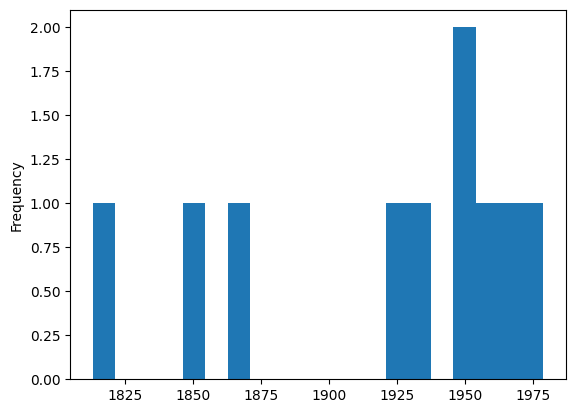

In [17]:
df["year"].plot(kind= "hist", bins= 20)